**Intro to ATLAS Data Pt.2**  
Ziyad Zawawi  
Phys427

Lorentz 4-vectors informs us about the energy and momentum of a particle. The values saved in the vectors don't change under any transformation, thus, having the same values in every frame of reference. The Lorentz 4-vectors are especially important for us because we can calculate the invariant mass of particles from them. When a particle decays, we are able to calculate its invariant mass from the energy and momentum of the decay products.

In [1]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import awkward 
import uproot_methods

In [2]:
# Importing the MC tree
file1 = uproot.open("mc_361106.Zee.4lep.root")["mini"]

# Extracting the needed values as arrays from the leaves 
lep_E, lep_pt, lep_eta, lep_phi = file1.arrays(["lep_E", "lep_pt", "lep_eta", "lep_phi"], outputtype=tuple)
lep_n, lep_charge, lep_type = file1.arrays(["lep_n", "lep_charge", "lep_type"], outputtype=tuple)

Following the same cuts that satisfy the requirement for a Z-ee decay, I first obtain the charges and the types of the leptons in a jagged array. That will allow us to create left and right pairs in order to compare them. As the pair of the leptons have to have opposite charge and the pair of leptons have to be of the same kind. Thus, by creating maskc for the first cut and maskt for the second cut, I'm able to make that comparison. Applying the mask to the E, pt, eta, and phi arrays to take of them only what satisfy. I'm ignoring the cut that concerns having at least two leptons because the file I'm using has the decay to at least 4 leptons.

In [3]:
charge = lep_charge.distincts()
lepType = lep_type.distincts()

In [4]:
# Making maskc 
leftc, rightc = charge.unzip()
maskc = leftc != rightc

opposite_charge = charge[maskc]

In [5]:
# Making maskt 
opposite_t = lepType[maskc]
leftt, rightt = opposite_t.unzip()
maskt = leftt == rightt

In [6]:
# Apply my maskc and maskt to the values we want to cut
pt = lep_pt.distincts()
opposite_pt = pt[maskc]
type_pt = opposite_pt[maskt]
leftpt, rightpt = type_pt.unzip()

eta = lep_eta.distincts()
opposite_eta = eta[maskc]
type_eta = opposite_eta[maskt]
lefteta, righteta = type_eta.unzip()

phi = lep_phi.distincts()
opposite_phi = phi[maskc]
type_phi = opposite_phi[maskt]
leftphi, rightphi = type_phi.unzip()

E = lep_E.distincts()
opposite_E = E[maskc]
type_E = opposite_E[maskt]
leftE, rightE = type_E.unzip()

In [7]:
# Calculating the invariant mass after putting the split E, phi, etc.. 
# into TLorentzVectrorArray.
lead_lep = uproot_methods.TLorentzVectorArray.from_ptetaphie(rightpt/1000., righteta, rightphi, rightE/1000.)
trail_lep = uproot_methods.TLorentzVectorArray.from_ptetaphie(leftpt/1000., lefteta, leftphi, leftE/1000.)

invmass = np.sqrt(((lead_lep.t + trail_lep.t)**2) - (lead_lep.x + trail_lep.x)**2 -
                    (lead_lep.y + trail_lep.y)**2 - (lead_lep.z + trail_lep.z)**2)



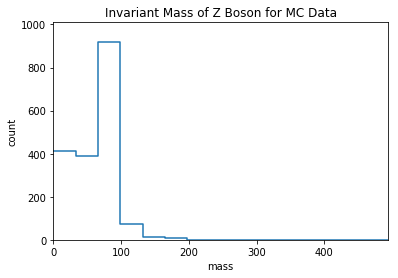

In [8]:
# Plotting histogram of invariant mass calculated
counts, edges = np.histogram(invmass.flatten(), bins=15)
plt.step(x=edges, y=np.append(counts, 0), where="post");
plt.xlim(edges[0], edges[-1]);
plt.ylim(0, counts.max() * 1.1);
plt.title("Invariant Mass of Z Boson for MC Data")
plt.ylabel("count");
plt.xlabel("mass");
plt.show()

In [9]:
# Repeating the same process but with using the data file
file2 = uproot.open("data_A.4lep.root")["mini"]

# Extracting the needed values as arrays from the leaves 
lep_E2, lep_pt2, lep_eta2, lep_phi2 = file2.arrays(["lep_E", "lep_pt", "lep_eta", "lep_phi"], outputtype=tuple)
lep_n2, lep_charge2, lep_type2 = file2.arrays(["lep_n", "lep_charge", "lep_type"], outputtype=tuple)

In [10]:
charge2 = lep_charge2.distincts()
lepType2 = lep_type2.distincts()

In [11]:
leftc2, rightc2 = charge2.unzip()
maskc2 = leftc2 != rightc2

opposite_charge2 = charge2[maskc2]

In [12]:
opposite_t2 = lepType2[maskc2]
leftt2, rightt2 = opposite_t2.unzip()
maskt2 = leftt2 == rightt2

In [13]:
pt2 = lep_pt2.distincts()
opposite_pt2 = pt2[maskc2]
type_pt2 = opposite_pt2[maskt2]
leftpt2, rightpt2 = type_pt2.unzip()


eta2 = lep_eta2.distincts()
opposite_eta2 = eta2[maskc2]
type_eta2 = opposite_eta2[maskt2]
lefteta2, righteta2 = type_eta2.unzip()

phi2 = lep_phi2.distincts()
opposite_phi2 = phi2[maskc2]
type_phi2 = opposite_phi2[maskt2]
leftphi2, rightphi2 = type_phi2.unzip()

E2 = lep_E2.distincts()
opposite_E2 = E2[maskc2]
type_E2 = opposite_E2[maskt2]
leftE2, rightE2 = type_E2.unzip()

In [14]:
lead_lep2 = uproot_methods.TLorentzVectorArray.from_ptetaphie(rightpt2/1000., righteta2, rightphi2, rightE2/1000.)
trail_lep2 = uproot_methods.TLorentzVectorArray.from_ptetaphie(leftpt2/1000., lefteta2, leftphi2, leftE2/1000.)

invmass2 = np.sqrt(((lead_lep2.t + trail_lep2.t)**2) - (lead_lep2.x + trail_lep2.x)**2 -
                    (lead_lep2.y + trail_lep2.y)**2 - (lead_lep2.z + trail_lep2.z)**2)

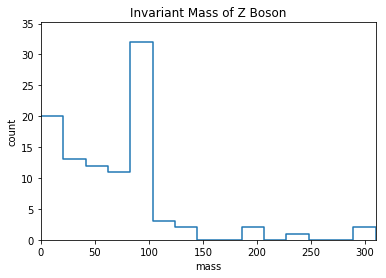

In [15]:
counts, edges = np.histogram(invmass2.flatten(), bins=15)
plt.step(x=edges, y=np.append(counts, 0), where="post");
plt.xlim(edges[0], edges[-1]);
plt.ylim(0, counts.max() * 1.1);
plt.ylabel("count");
plt.xlabel("mass");
plt.title("Invariant Mass of Z Boson")
plt.show()